# 단순 선형 회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 선형회귀 관련 scikit-learn library
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

In [4]:
# 간단한 예제
X = np.array([[0], [1], [2]])
y = np.array([0, 1.2, 1.6])

# model 변수 저장
model = linear_model.LinearRegression()

# 훈련
model.fit(X, y)

LinearRegression()

In [5]:
# train 예측하기 --> 회귀선 예측하기
pred_train = model.predict(X)
pred_train

array([0.13333333, 0.93333333, 1.73333333])

In [6]:
# test --> 새로운 값 넣어서 예측값 확인하기
pred_test = model.predict([[1.5]])
pred_test

array([1.33333333])

In [11]:
# 기울기 : coefficient
model.coef_

array([0.8])

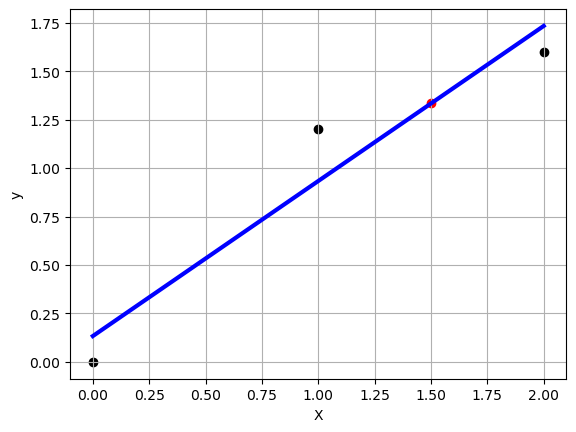

In [10]:
# 시각화
# 실제 값
plt.scatter(X, y, color='black')
# 예측값
plt.scatter(1.5, pred_test, color='red')

plt.plot(X, pred_train, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')

plt.grid()
plt.show()

## 실데이터에 적용하기

In [13]:
raw = pd.read_csv('../datasets/ML_data/Advertising.csv', index_col=0)
ad = raw.copy()
print(ad.shape)
ad.head(2)

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4


In [17]:
# 선형회귀 모델 적용하기
# train/test data 분리하기 >> 과적합 방지
train = ad[:-20]
test = ad[-20:]

# train data의 feature과 label 분리하기
X_train = train.iloc[:, :-1]
y_train = train[['Sales']]

# test data의 feature과 label 분리하기
X_test = test.iloc[:, :-1]
y_test = test[['Sales']]

*  TV

In [18]:
# 모델링 - 선형회귀
model = linear_model.LinearRegression()

# 훈련
model.fit(X_train[['TV']], y_train) # train data 중 TV만 사용

LinearRegression()

In [20]:
# 훈련용 데이터 이용 >> 예측
y_train_pred = model.predict(X_train[['TV']])
y_train_pred[:3]

array([[17.95508512],
       [ 9.25168867],
       [ 7.97150159]])

In [21]:
# 평가용 데이터 이용 >> 예측
y_test_pred = model.predict(X_test[['TV']])
y_test_pred[:3]

array([[14.50842759],
       [17.41112285],
       [ 9.80034028]])

In [22]:
# 기울기 확인
model.coef_

array([[0.0468933]])

In [23]:
# 훈련용 MSE 확인
mean_squared_error(y_train, y_train_pred)

10.316339960041683

In [24]:
# 평가용 MSE 확인
mean_squared_error(y_test, y_test_pred)

12.324071145849308

In [26]:
# 훈련용 데이터에 대한 결정계수 확인 (R^2)
print(f'train R^2 : {r2_score(y_train, y_train_pred)}\ntest R^2 : {r2_score(y_test, y_test_pred)}')

train R^2 : 0.6072402179372907
test R^2 : 0.6423749789914126


In [27]:
# statsmodels 활용, 선형회귀분석
# statsmodels의 OLS 함수는 데이터 내에 intercept하는 feature가 필요하다.
sm_X_train = X_train
sm_X_train['x0'] = 1

sm_X_test = X_test
sm_X_test['x0'] = 1

In [35]:
# 훈련하기 - train
model = sm.OLS(y_train, sm_X_train[['x0', 'TV']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     275.2
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           5.76e-38
Time:                        17:14:23   Log-Likelihood:                -465.44
No. Observations:                 180   AIC:                             934.9
Df Residuals:                     178   BIC:                             941.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0             7.1649      0.478     14.978      0.000       6.221       8.109
TV             0.0469      0.003     16.589      0.000       0.041       0.052
==============================================================================
Omnibus:                        0.515   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.547
Skew:                          -0.127   Prob(JB):                        0.761
Kurtosis:                       2.906   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# model.predict()

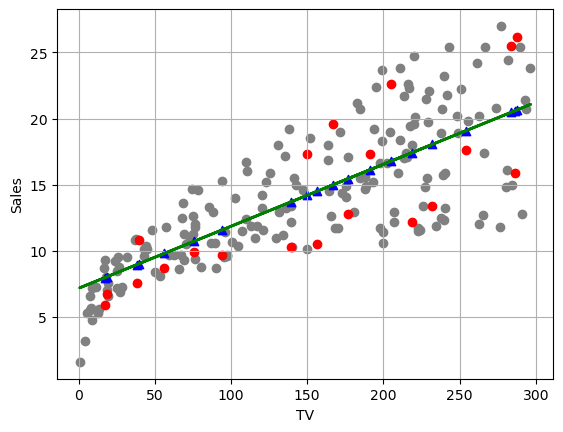

In [31]:
# 시각화
# train data
plt.scatter(X_train.TV, y_train.Sales, color='gray')
# test data
plt.scatter(X_test.TV, y_test.Sales, color='red')
# 회귀선 그려보기
plt.plot(X_train.TV, y_train_pred, color='green', linewidth=2)
# 예측값 확인
plt.scatter(X_test.TV, y_test_pred, color='blue', marker='^')

plt.xlabel('TV')
plt.ylabel('Sales')

plt.grid()
plt.show()

* Radio

In [34]:
# 모델 설정
model = linear_model.LinearRegression()

# 모델 훈련하기
model.fit(X_train[['Radio']], y_train)

# 예측하기 - 훈련용
y_train_pred = model.predict(X_train[['Radio']])
# 예측하기 - 평가용
y_test_pred = model.predict(X_test[['Radio']])

# 기울기, 훈련용 MSE, 훈련용 R^2, 평가용 MSE, 평가용 R^2 확인하기
print('기울기 (coefficient) :', model.coef_)
print('train MSE :', mean_squared_error(y_train, y_train_pred), '/ train R^2 :', r2_score(y_train, y_train_pred))
print('test MSE :', mean_squared_error(y_test, y_test_pred), '/ test R^2 :', r2_score(y_test, y_test_pred))

기울기 (coefficient) : [[0.19177198]]
train MSE : 18.423285809082806 / train R^2 : 0.29859565046505787
test MSE : 15.44584710102701 / test R^2 : 0.5517859862517418


In [37]:
# statsmodels 활용하기
model = sm.OLS(y_train, sm_X_train[['x0', 'Radio']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     75.78
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           2.11e-15
Time:                        17:18:39   Log-Likelihood:                -517.63
No. Observations:                 180   AIC:                             1039.
Df Residuals:                     178   BIC:                             1046.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0             9.4721      0.614     15.433      0.000       8.261      10.683
Radio          0.1918      0.022      8.705      0.000       0.148       0.235
==============================================================================
Omnibus:                       16.101   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.639
Skew:                          -0.734   Prob(JB):                     0.000148
Kurtosis:                       3.441   Cond. No.                         53.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

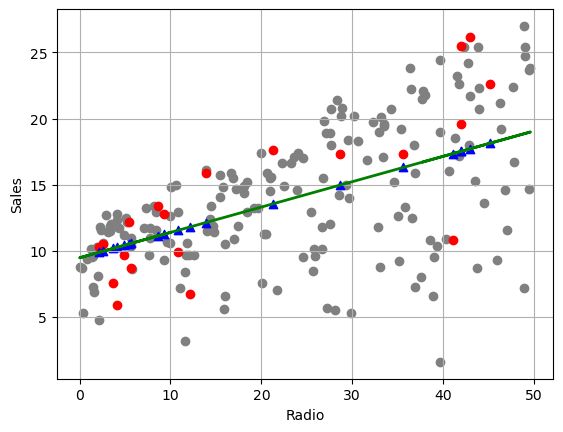

In [38]:
# 시각화하기
# train data
plt.scatter(X_train.Radio, y_train.Sales, color='gray')
# test data
plt.scatter(X_test.Radio, y_test.Sales, color='red')
# 회귀선 그려보기
plt.plot(X_train.Radio, y_train_pred, color='green', linewidth=2)
# 예측값 확인
plt.scatter(X_test.Radio, y_test_pred, color='blue', marker='^')

plt.xlabel('Radio')
plt.ylabel('Sales')

plt.grid()
plt.show()

* newspaper

In [40]:
# 모델 설정
model = linear_model.LinearRegression()

# 모델 훈련하기
model.fit(X_train[['Newspaper']], y_train)

# 예측하기 - 훈련용
y_train_pred = model.predict(X_train[['Newspaper']])
# 예측하기 - 평가용
y_test_pred = model.predict(X_test[['Newspaper']])

# 기울기, 훈련용 MSE, 훈련용 R^2, 평가용 MSE, 평가용 R^2 확인하기
print('기울기 (coefficient) :', model.coef_)
print('train MSE :', mean_squared_error(y_train, y_train_pred), '/ train R^2 :', r2_score(y_train, y_train_pred))
print('test MSE :', mean_squared_error(y_test, y_test_pred), '/ test R^2 :', r2_score(y_test, y_test_pred))

기울기 (coefficient) : [[0.04801078]]
train MSE : 25.17468566316838 / train R^2 : 0.04155891596623251
test MSE : 30.406463968176674 / test R^2 : 0.11765258519475585


In [41]:
# statsmodels 활용하기
model = sm.OLS(y_train, sm_X_train[['x0', 'Newspaper']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     7.718
Date:                Fri, 14 Jun 2024   Prob (F-statistic):            0.00605
Time:                        17:22:39   Log-Likelihood:                -545.73
No. Observations:                 180   AIC:                             1095.
Df Residuals:                     178   BIC:                             1102.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0            12.5030      0.664     18.839      0.000      11.193      13.813
Newspaper      0.0480      0.017      2.778      0.006       0.014       0.082
==============================================================================
Omnibus:                        4.929   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.653
Skew:                           0.336   Prob(JB):                       0.0976
Kurtosis:                       2.590   Cond. No.                         67.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

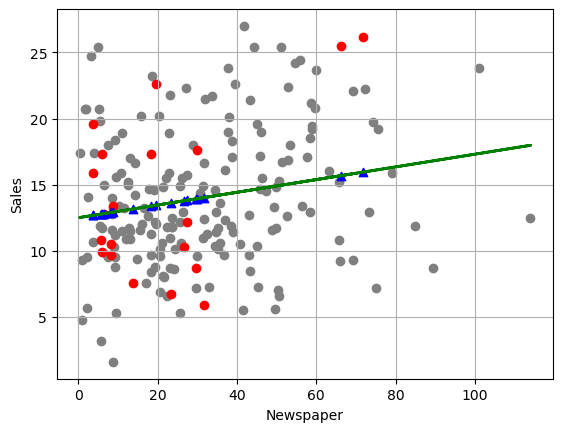

In [42]:
# 시각화하기
# train data
plt.scatter(X_train.Newspaper, y_train.Sales, color='gray')
# test data
plt.scatter(X_test.Newspaper, y_test.Sales, color='red')
# 회귀선 그려보기
plt.plot(X_train.Newspaper, y_train_pred, color='green', linewidth=2)
# 예측값 확인
plt.scatter(X_test.Newspaper, y_test_pred, color='blue', marker='^')

plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.grid()
plt.show()